In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import roc_auc_score, accuracy_score

In [3]:
hr = pd.read_csv(r"/home/sarthakredasani/Documents/CDAC_ML/Cases/Cases/human-resources-analytics/HR_comma_sep.csv")
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [4]:
X, y = hr.drop('left', axis=1), hr['left']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [5]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)), 
                             ("passthrough",make_column_selector(dtype_exclude=object)),
                              verbose_feature_names_out=False)
ct = ct.set_output(transform='pandas')

In [6]:
X_trn_ohe = ct.fit_transform(X_train)
X_tst_ohe = ct.transform(X_test)

In [7]:
prcomp = PCA().set_output(transform='pandas')
X_trn_pca = prcomp.fit_transform(X_trn_ohe)
X_tst_pca = prcomp.transform(X_tst_ohe)

In [8]:
np.cumsum(prcomp.explained_variance_ratio_ *100)

array([ 99.80703267,  99.89328857,  99.94031756,  99.95858862,
        99.9680321 ,  99.97458997,  99.97958484,  99.98368703,
        99.98615829,  99.9885499 ,  99.99074522,  99.99280042,
        99.99478659,  99.9966828 ,  99.99798431,  99.99890824,
        99.99967871, 100.        ])

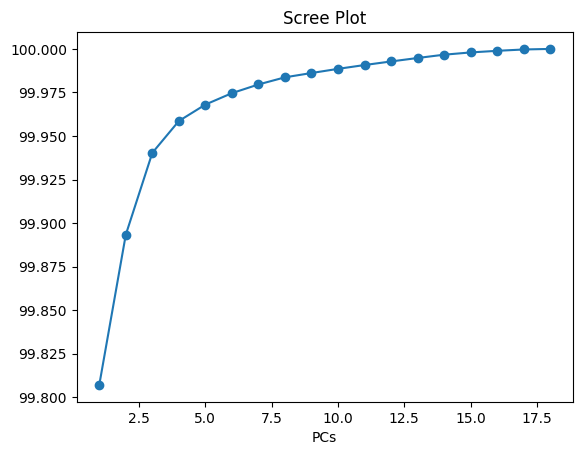

In [9]:
plt.scatter(np.arange(1, X_trn_ohe.shape[1]+1) , np.cumsum(prcomp.explained_variance_ratio_ *100))
plt.plot(np.arange(1, X_trn_ohe.shape[1]+1) , np.cumsum(prcomp.explained_variance_ratio_ *100))
plt.xlabel("PCs")
plt.title("Scree Plot")
plt.show()

In [10]:
lr = LogisticRegression()
lr.fit(X_trn_pca.iloc[:,:2], y_train)
y_pred = lr.predict(X_tst_pca.iloc[:,:2])
print(accuracy_score(y_test, y_pred))

0.7546121360302289


In [11]:
# Using scaling

In [12]:
scaler = StandardScaler()

In [13]:
X_trn_scl = scaler.fit_transform(X_trn_ohe)
X_tst_scl = scaler.transform(X_tst_ohe)

In [14]:
prcomp = PCA().set_output(transform='pandas')
X_trn_pca = prcomp.fit_transform(X_trn_scl)
X_tst_pca = prcomp.transform(X_tst_scl)

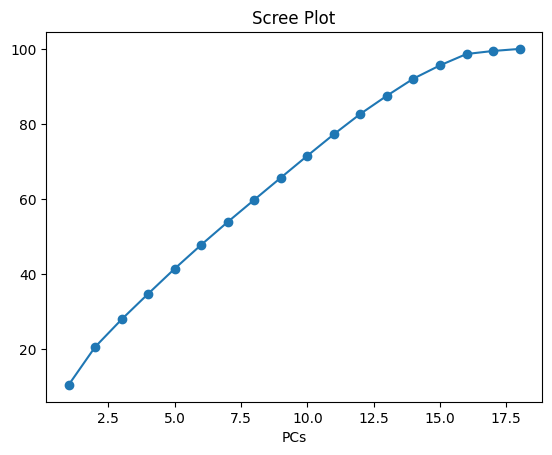

In [15]:
plt.scatter(np.arange(1, X_trn_ohe.shape[1]+1) , np.cumsum(prcomp.explained_variance_ratio_ *100))
plt.plot(np.arange(1, X_trn_ohe.shape[1]+1) , np.cumsum(prcomp.explained_variance_ratio_ *100))
plt.xlabel("PCs")
plt.title("Scree Plot")
plt.show()

In [16]:
lr = LogisticRegression()
lr.fit(X_trn_pca.iloc[:,:3], y_train)
y_pred = lr.predict(X_tst_pca.iloc[:,:3])
print(accuracy_score(y_test, y_pred))

0.762169370971327


In [17]:
#  using pipeline

In [18]:
prcomp = PCA(n_components=9).set_output(transform='pandas')
pipe = Pipeline([('CT',ct), ('SCL',scaler), ('PCA',prcomp), ('LR',lr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.78239608801956


In [19]:
np.cumsum(prcomp.explained_variance_ratio_ *100)

array([10.40178671, 20.54642315, 27.89502036, 34.7204589 , 41.41037659,
       47.7757818 , 53.87157964, 59.78241706, 65.66220656])

In [20]:
#  specifying proportion in n_components

In [21]:
prcomp = PCA(n_components=0.85).set_output(transform='pandas')
pipe = Pipeline([('CT',ct), ('SCL',scaler), ('PCA',prcomp), ('LR',lr)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7732829517670593


In [22]:
np.cumsum(prcomp.explained_variance_ratio_ *100)

array([10.40178671, 20.54642315, 27.89502036, 34.7204589 , 41.41037659,
       47.7757818 , 53.87157964, 59.78241706, 65.66220656, 71.51420384,
       77.2483374 , 82.68393776, 87.52473423])